In [1]:
import hvsrpy

from obspy.clients.fdsn import Client
from obspy import UTCDateTime

import numpy as np
from scipy import stats


In [2]:
from matplotlib import pyplot as plt

In [3]:
'''IMPORT MODULES '''

from get_waveforms import get_waveforms
from get_hvsr import get_hvsr

## Northridge Earthquake 7.1 2019-07-06

In [4]:
t= UTCDateTime('2019-07-06T03:19:53.000')
starttime = t - 1*3600
endtime = t + 1*3600
net = 'CI'
sta = 'USC'
loc = '*'
channel = ['HHE','HHN','HHZ']
client = 'IRIS'

usc_northridge1 = get_waveforms(client=client, net=net, sta=sta, loc=loc, channel=channel, t=t, starttime=starttime, endtime=endtime)

In [5]:
ew = usc_northridge1[0]
ns = usc_northridge1[1]
vt = usc_northridge1[2]

hvsr = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)

In [6]:
hvsr10 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr20 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr40 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr80 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr200 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr300 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr400 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr800 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)

In [9]:

'''Parameters to create hvsr object'''

# windowlength = 40

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.
filter_bool = False        
# Low-cut frequency for bandpass filter.
filter_flow = 0.1                  
# High-cut frequency for bandpass filter.
filter_fhigh = 30                   
# Filter order.
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1


"""FREQUENCY DOMAIN SETTING"""

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40

# Minimum frequency after resampling
resample_fmin = 0.1 
# Maximum frequency after resampling
resample_fmax = 50
# Number of frequencies after resampling
resample_fnum = 200
# Type of resampling {'log', 'linear'}
resample_type = 'log'

# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None

"""HVSR Settings"""
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


<code> def hv(self, windowlength, bp_filter, taper_width, bandwidth,
           resampling, method, f_low=None, f_high=None, azimuth=None) </code>

In [10]:
# wi_10 = hvsr10.hv(windowlength=10, bp_filter = bp_filter, taper_width = width,
#               bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

# wi_20 = hvsr20.hv(windowlength=20, bp_filter = bp_filter, taper_width = width,
#               bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_40 = hvsr40.hv(windowlength=40, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_80 = hvsr80.hv(windowlength=80, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_200 = hvsr200.hv(windowlength=200, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_300 = hvsr300.hv(windowlength=300, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_400 = hvsr400.hv(windowlength=400, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_800 = hvsr800.hv(windowlength=800, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

C:\Users\kickk\AppData\Roaming\Python\Python38\site-packages\sigpropy\timeseries.py:267: UserWarning: nseries > 1, so joining before splitting.
  warnings.warn("nseries > 1, so joining before splitting.")


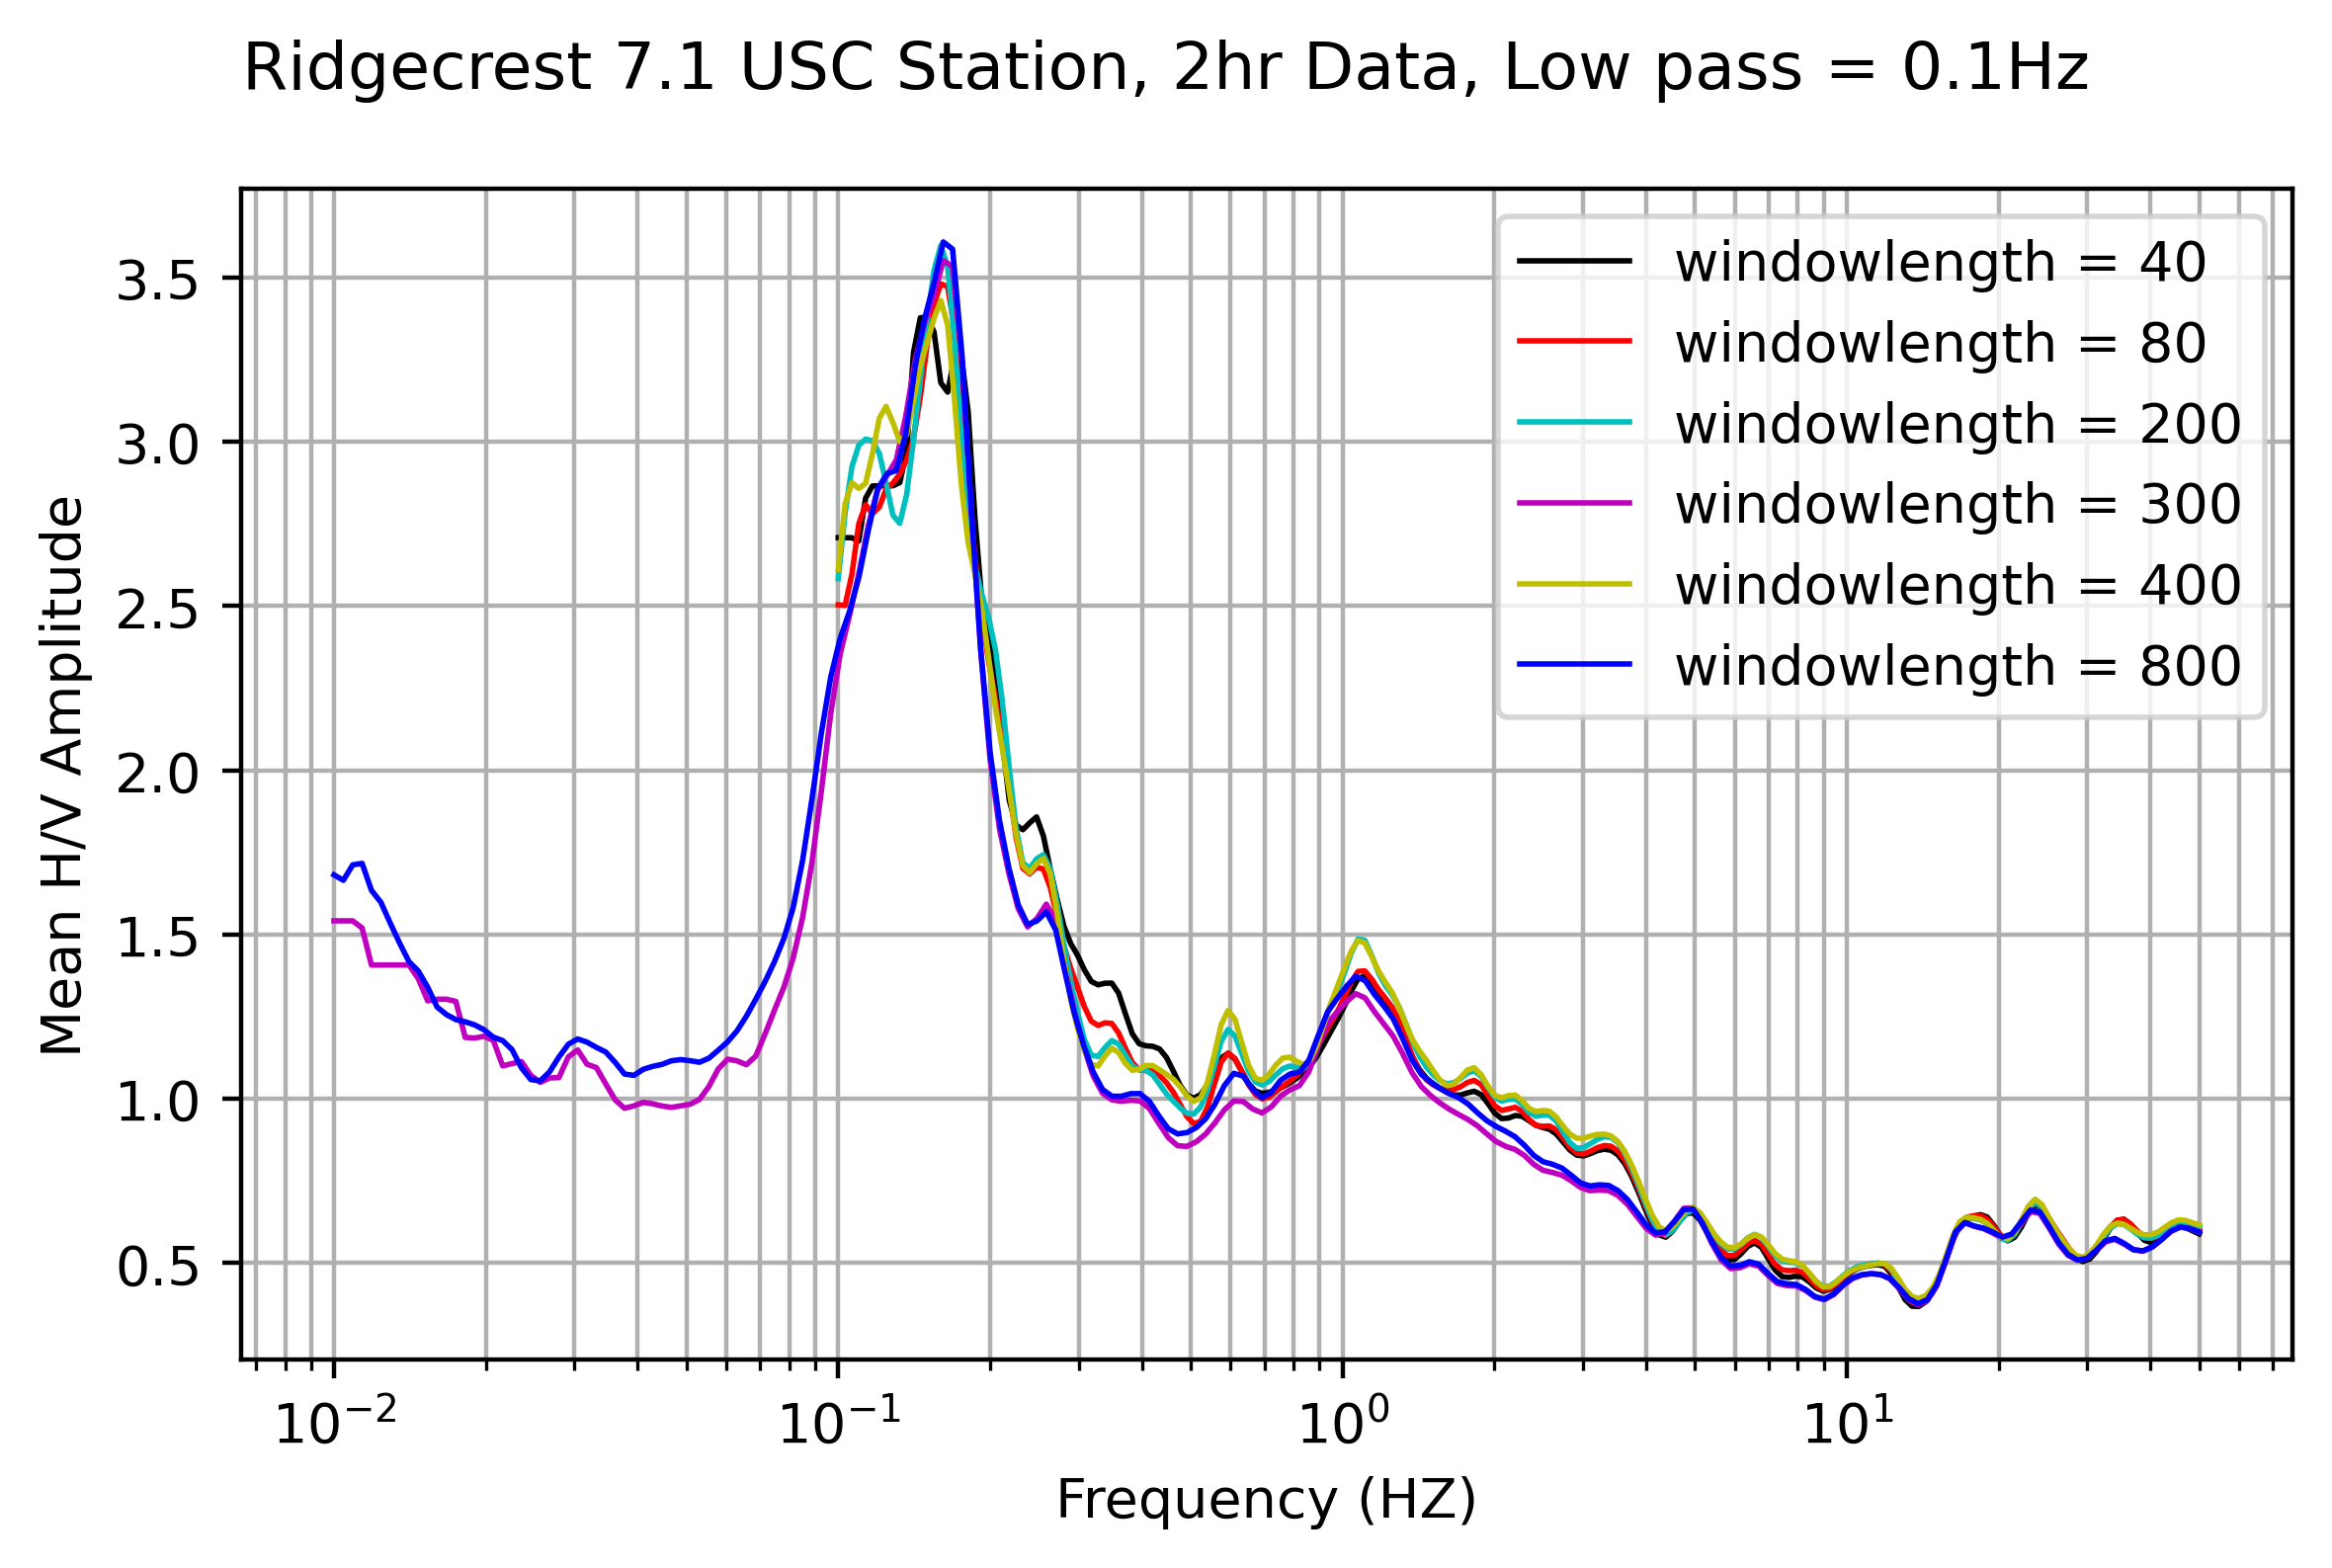

In [33]:
fig, ax = plt.subplots(dpi=400)

# ax.plot(usc_noridge_hvsr.frq, usc_noridge_hvsr.amp, color='c', linewidth=0.5)
'''Ignore 0 division'''
np.seterr(invalid='ignore')


# for amp in usc_noridge_hvsr.amp:
#     ax.plot(usc_noridge_hvsr.frq, amp, color='#888888', linewidth=0.3)
#     label = None

ax.plot(wi_40.frq, wi_40.mean_curve(distribution="lognormal"), color='k', linewidth=1, label='windowlength = 40')
ax.plot(wi_80.frq, wi_80.mean_curve(distribution="lognormal"), color='r', linewidth=1, label='windowlength = 80')
ax.plot(wi_200.frq, wi_200.mean_curve(distribution="lognormal"), color='c', linewidth=1, label='windowlength = 200')
ax.plot(wi_300.frq, wi_300.mean_curve(distribution="lognormal"), color='m', linewidth=1, label='windowlength = 300')
ax.plot(wi_400.frq, wi_400.mean_curve(distribution="lognormal"), color='y', linewidth=1, label='windowlength = 400')
ax.plot(wi_800.frq, wi_800.mean_curve(distribution="lognormal"), color='b', linewidth=1, label='windowlength = 800')



    
# ax.plot([usc_noridge_hvsr.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")

ax.legend()
# Setting axis scale
ax.set_xscale('log')
ax.set_yscale('linear')

# Setting axes title
ax.set_xlabel('Frequency (HZ)')
ax.set_ylabel('Mean H/V Amplitude')
fig.suptitle("Ridgecrest 7.1 USC Station, 2hr Data, Low pass = 0.1Hz")

# ax.plot([usc_noridge_hvsr.mean_f0_frq('lognormal')]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
plt.grid(which='both', axis='both')


fname = 'C:/University of Southern California Education/Research/HVSR/Figures/RC_71_2hrData.jpg'
plt.tight_layout()

plt.savefig(fname = fname, dpi=600, bbox_inches='tight')

plt.show()

In [29]:

'''Parameters to create hvsr object'''

# windowlength = 40

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.
filter_bool = False        
# Low-cut frequency for bandpass filter.
filter_flow = 0.01                   
# High-cut frequency for bandpass filter.
filter_fhigh = 30                   
# Filter order.
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1


"""FREQUENCY DOMAIN SETTING"""

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40

# Minimum frequency after resampling
resample_fmin = 0.01
# Maximum frequency after resampling
resample_fmax = 50
# Number of frequencies after resampling
resample_fnum = 200
# Type of resampling {'log', 'linear'}
resample_type = 'log'

# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None

"""HVSR Settings"""
bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}
resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency dom
#nmain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"

t= UTCDateTime('2019-07-06T03:19:53.000')
starttime = t - 12*3600
endtime = t + 12*3600
net = 'CI'
sta = 'USC'
loc = '*'
channel = ['HHE','HHN','HHZ']
client = 'IRIS'

usc_northridge2 = get_waveforms(client=client, net=net, sta=sta, loc=loc, channel=channel, t=t, starttime=starttime, endtime=endtime)

In [30]:
ew = usc_northridge2[0]
ns = usc_northridge2[1]
vt = usc_northridge2[2]

hvsr = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)

In [32]:
hvsr300 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr500 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr800 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr1000 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr2000 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)
hvsr5000 = hvsrpy.Sensor3c(ew=ew, ns=ns, vt=vt, meta=None)


wi_300 = hvsr300.hv(windowlength=300, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_500 = hvsr80.hv(windowlength=500, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_800 = hvsr200.hv(windowlength=800, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_1000 = hvsr300.hv(windowlength=1000, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_2000 = hvsr400.hv(windowlength=2000, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

wi_5000 = hvsr800.hv(windowlength=5000, bp_filter = bp_filter, taper_width = width,
                bandwidth=bandwidth,resampling=resampling,method=method, f_low=None, f_high=None, azimuth=None)

C:\Users\kickk\AppData\Roaming\Python\Python38\site-packages\sigpropy\timeseries.py:267: UserWarning: nseries > 1, so joining before splitting.
  warnings.warn("nseries > 1, so joining before splitting.")


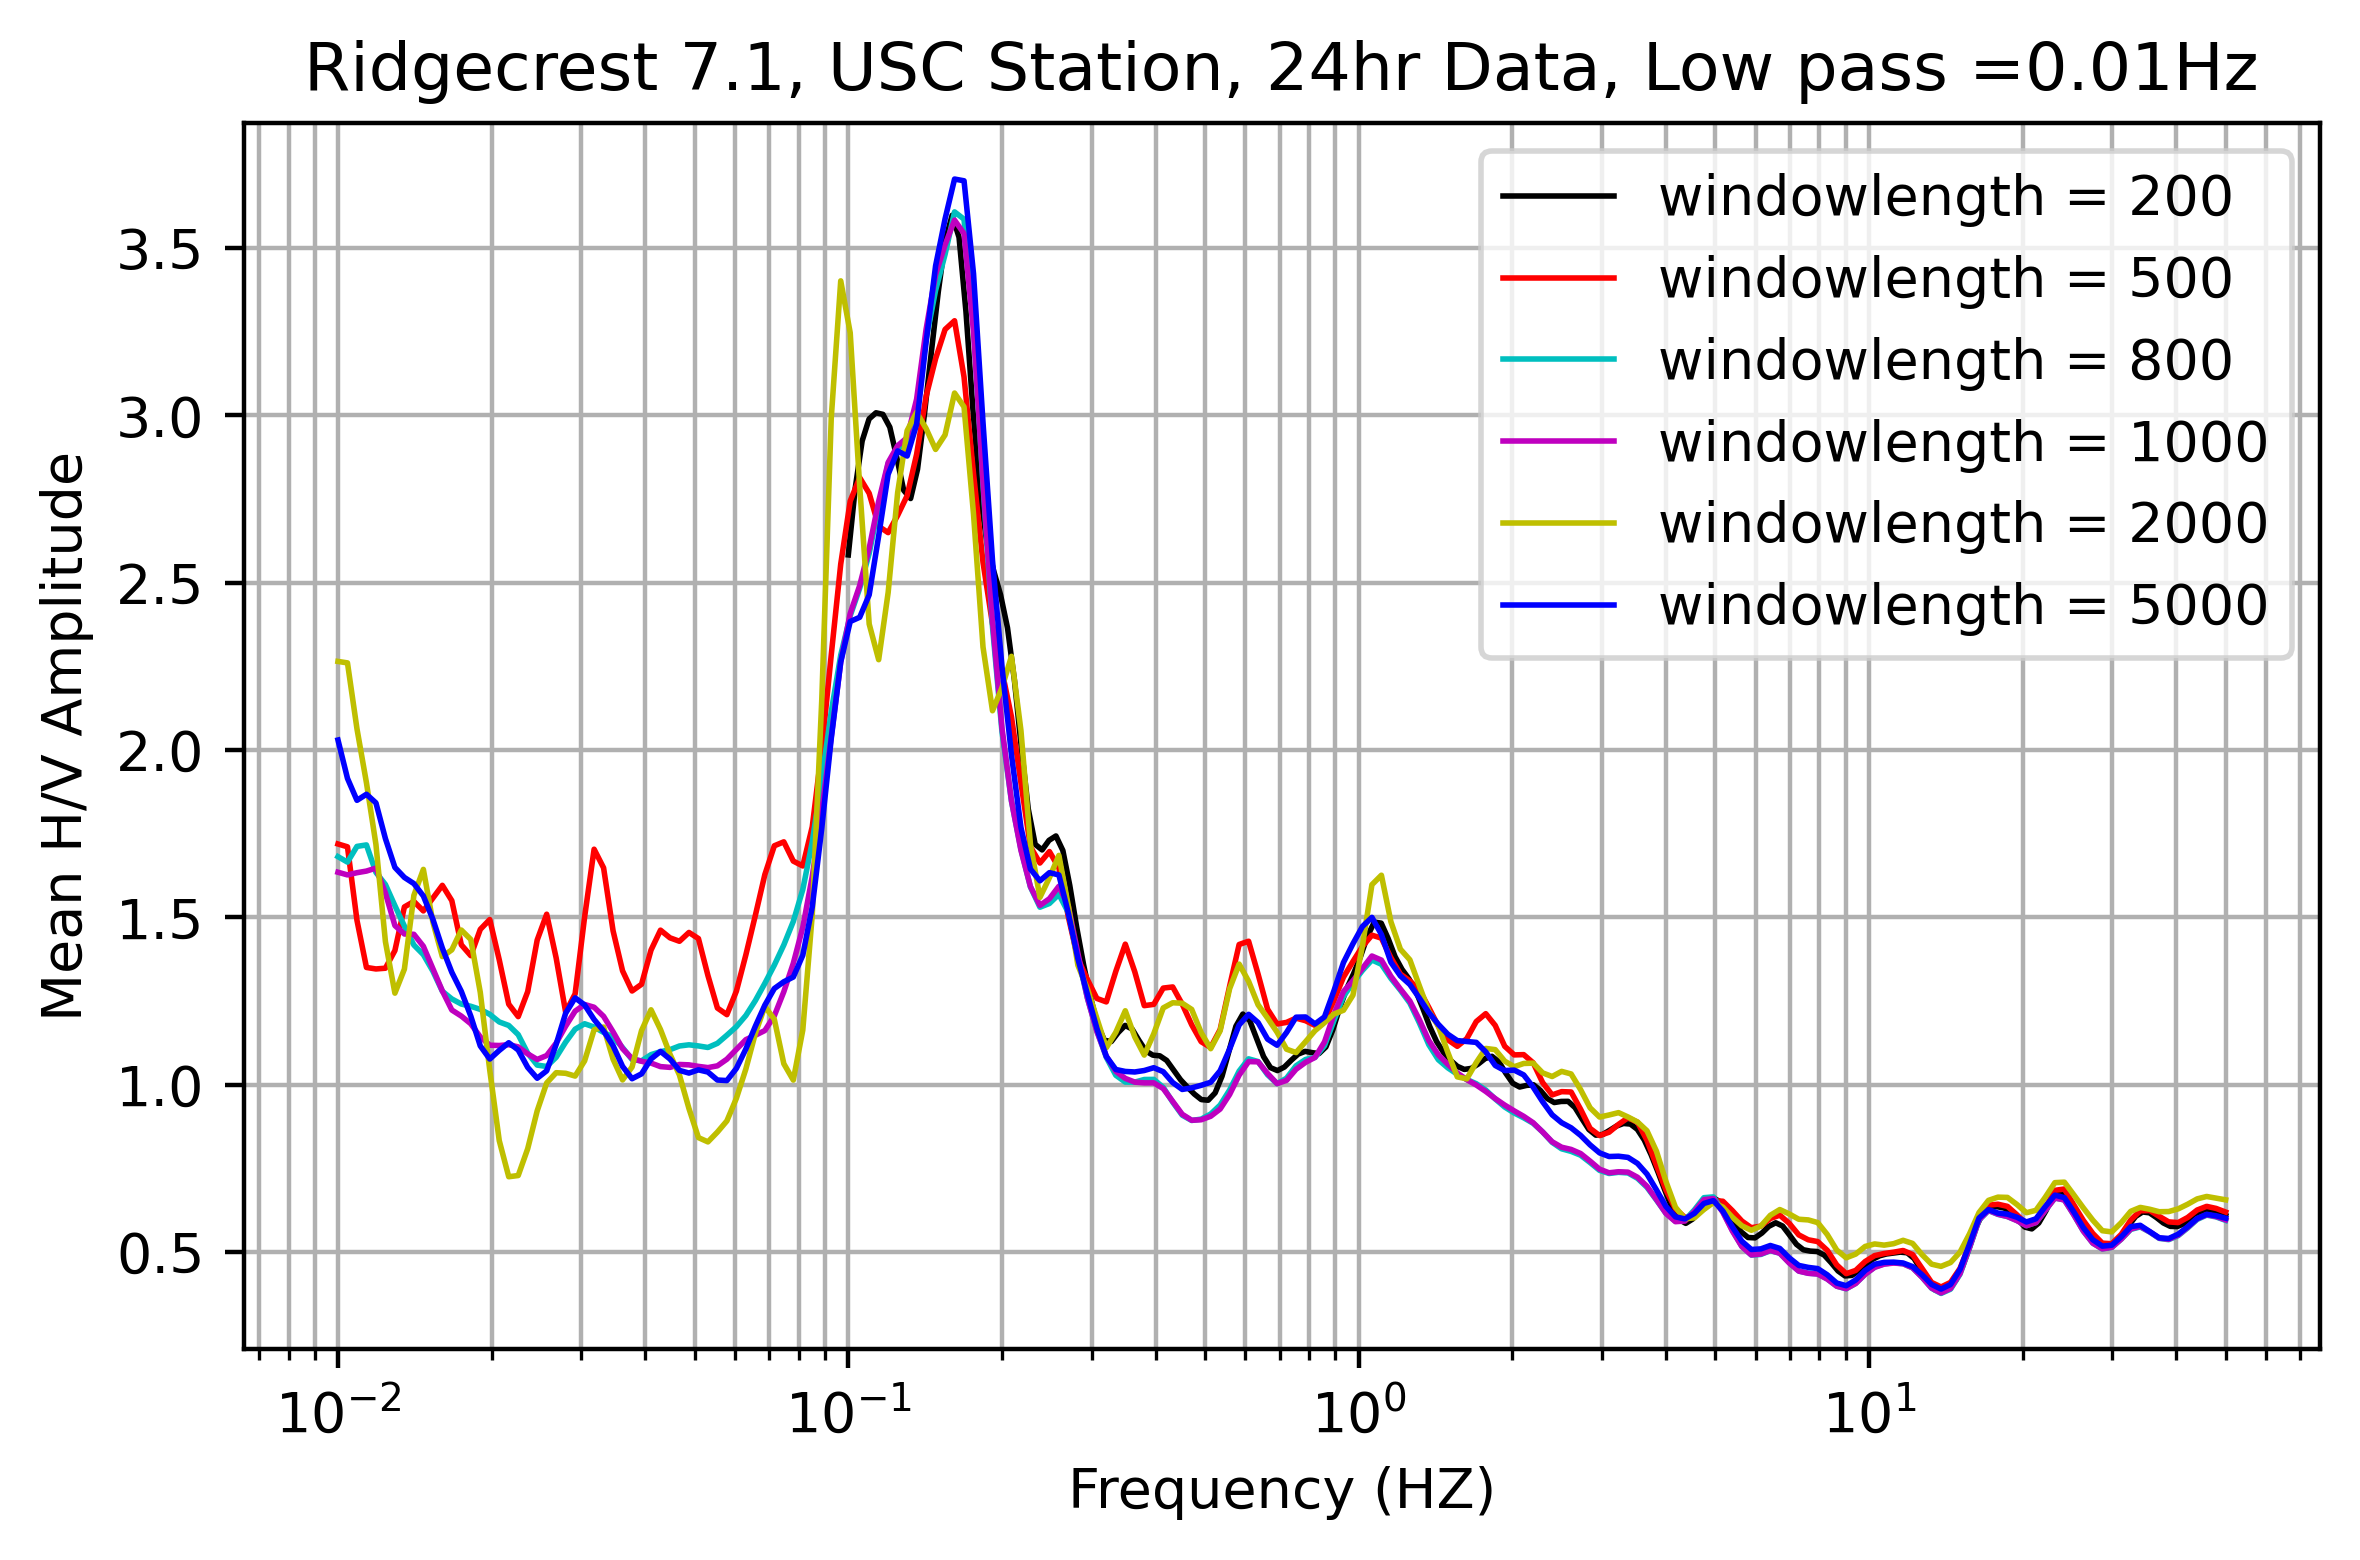

In [35]:
fig, ax = plt.subplots(dpi=400)

# ax.plot(usc_noridge_hvsr.frq, usc_noridge_hvsr.amp, color='c', linewidth=0.5)
'''Ignore 0 division'''
np.seterr(invalid='ignore')


# for amp in usc_noridge_hvsr.amp:
#     ax.plot(usc_noridge_hvsr.frq, amp, color='#888888', linewidth=0.3)
#     label = None

ax.plot(wi_200.frq, wi_200.mean_curve(distribution="lognormal"), color='k', linewidth=1, label='windowlength = 200')
ax.plot(wi_500.frq, wi_500.mean_curve(distribution="lognormal"), color='r', linewidth=1, label='windowlength = 500')
ax.plot(wi_800.frq, wi_800.mean_curve(distribution="lognormal"), color='c', linewidth=1, label='windowlength = 800')
ax.plot(wi_1000.frq, wi_1000.mean_curve(distribution="lognormal"), color='m', linewidth=1, label='windowlength = 1000')
ax.plot(wi_2000.frq, wi_2000.mean_curve(distribution="lognormal"), color='y', linewidth=1, label='windowlength = 2000')
ax.plot(wi_5000.frq, wi_5000.mean_curve(distribution="lognormal"), color='b', linewidth=1, label='windowlength = 5000')




    
# ax.plot([usc_noridge_hvsr.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")

ax.legend()
# Setting axis scale
ax.set_xscale('log')
ax.set_yscale('linear')

# Setting axes title
ax.set_xlabel('Frequency (HZ)')
ax.set_ylabel('Mean H/V Amplitude')
plt.title('Ridgecrest 7.1, USC Station, 24hr Data, Low pass =0.01Hz')
# ax.plot([usc_noridge_hvsr.mean_f0_frq('lognormal')]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
plt.grid(which='both', axis='both')

## SAVE FIGURE

fname = 'C:/University of Southern California Education/Research/HVSR/Figures/RC_71_24hrData.jpg'
plt.tight_layout()

plt.savefig(fname = fname, dpi=600, bbox_inches='tight')

plt.show()